import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import os
import h5py

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import os
import h5py

In [2]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D

Using TensorFlow backend.


In [3]:
# first we ll focus on retriving image from csv column
# the values are stored in a string in image column
# so, we ll first extract out values and put into array, convert it to numpy array
# and then resize into (48,48)
# then append one by one all rows into an array, convert the bigger array to numpy

df = pd.read_csv(os.path.abspath('fer2013') + '/fer2013.csv')
df.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [13]:
def extractFromStr(df):
    
    imgArray = []
    
    for img in df['pixels']:
        numberArray = []
        
        #print(img.split(' '))
        for number in img.split(' '):
            numberArray.append(number)
            
        numberArray = np.array(numberArray, dtype = np.int)
        numberArray = np.reshape(numberArray, (48, 48, 1))
        
        imgArray.append(numberArray)
        
    imgArray = np.array(imgArray)
    print(imgArray.shape)
    
    return imgArray

In [14]:
allImgArray = extractFromStr(df)

(35887, 48, 48, 1)


In [15]:
# now we ll bring up the labels too

labels = np.array(df['emotion'])
labels.shape

(35887,)

In [16]:
# now we ll shuffle the data with images and labels together

data, labelShuffle = shuffle(allImgArray, labels, random_state = 2)

4


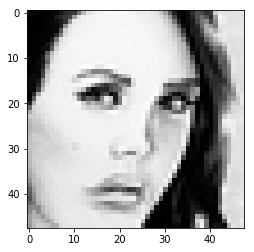

In [17]:
# now let us see the image along with its label

imgId = 3

imgPlot = np.reshape(data[imgId], (48, 48))

plt.imshow(imgPlot, cmap = 'gray')
#plt.xlabel(labelShuffle[imgId])
print(labelShuffle[imgId])
plt.show()

In [18]:
# now we ll go into building cnn

#first choosing the hyper parameters
batchSize = 512
epochs = 30 # we ll do in total 300 epochs, in gropus of 30, as model architecture is too big
classes = 7

# 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

# now we ll convert labels into one hot encodding

labelsOneHot = np_utils.to_categorical(labelShuffle, classes)
labelsOneHot[3]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [19]:
# constructing model

model = Sequential()

# here we ll use zero padding to keep the shape same,
# in the first layer we need to give input shape

model.add(Convolution2D(filters = 32, kernel_size = (3, 3), padding = 'same', input_shape = (48, 48, 1)))
convout1 = Activation('relu')
model.add(convout1)

model.add(Convolution2D(filters = 32, kernel_size = (3, 3), padding = 'same'))
convout2 = Activation('relu')
model.add(convout2)

model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


model.add(Convolution2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
convout3 = Activation('relu')
model.add(convout3)

model.add(Convolution2D(filters = 64, kernel_size = (3, 3), padding = 'same'))
convout4 = Activation('relu')
model.add(convout4)

model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))


model.add(Convolution2D(filters = 128, kernel_size = (3, 3), padding = 'same'))
convout5 = Activation('relu')
model.add(convout5)

model.add(Convolution2D(filters = 128, kernel_size = (3, 3), padding = 'same'))
convout6 = Activation('relu')
model.add(convout6)

model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
            
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7))
model.add(Activation('softmax'))

In [20]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [21]:
for i in range(10):
    
    model.fit(data, labelsOneHot, validation_split = 0.1, batch_size = batchSize, epochs = epochs, verbose = 1)
    model.save(os.getcwd() + '/saved_model/keras_face_expres_model_new' + str(i*epochs + epochs) +'.h5')

Train on 32298 samples, validate on 3589 samples
Epoch 1/30
32298/32298 [==============================] - 83s - loss: 2.3388 - acc: 0.2396 - val_loss: 1.7140 - val_acc: 0.3054
Epoch 2/30
32298/32298 [==============================] - 60s - loss: 1.6493 - acc: 0.3518 - val_loss: 1.5740 - val_acc: 0.3945
Epoch 3/30
32298/32298 [==============================] - 60s - loss: 1.5111 - acc: 0.4177 - val_loss: 1.5025 - val_acc: 0.4202
Epoch 4/30
32298/32298 [==============================] - 60s - loss: 1.3943 - acc: 0.4657 - val_loss: 1.3474 - val_acc: 0.4865
Epoch 5/30
32298/32298 [==============================] - 61s - loss: 1.3007 - acc: 0.5053 - val_loss: 1.2948 - val_acc: 0.5065
Epoch 6/30
32298/32298 [==============================] - 58s - loss: 1.2239 - acc: 0.5389 - val_loss: 1.2475 - val_acc: 0.5252
Epoch 7/30
32298/32298 [==============================] - 58s - loss: 1.1318 - acc: 0.5718 - val_loss: 1.2039 - val_acc: 0.5458
Epoch 8/30
32298/32298 [==============================]

32298/32298 [==============================] - 53s - loss: 0.0440 - acc: 0.9856 - val_loss: 2.8633 - val_acc: 0.5745
Epoch 7/30
32298/32298 [==============================] - 53s - loss: 0.0501 - acc: 0.9838 - val_loss: 2.6201 - val_acc: 0.5762
Epoch 8/30
32298/32298 [==============================] - 53s - loss: 0.0580 - acc: 0.9812 - val_loss: 2.6114 - val_acc: 0.5717
Epoch 9/30
32298/32298 [==============================] - 53s - loss: 0.0523 - acc: 0.9835 - val_loss: 2.6493 - val_acc: 0.5773
Epoch 10/30
32298/32298 [==============================] - 53s - loss: 0.0566 - acc: 0.9813 - val_loss: 2.7453 - val_acc: 0.5812
Epoch 11/30
32298/32298 [==============================] - 54s - loss: 0.0574 - acc: 0.9820 - val_loss: 2.6001 - val_acc: 0.5773
Epoch 12/30
32298/32298 [==============================] - 54s - loss: 0.0535 - acc: 0.9828 - val_loss: 2.5778 - val_acc: 0.5879
Epoch 13/30
32298/32298 [==============================] - 54s - loss: 0.0534 - acc: 0.9831 - val_loss: 2.4427 -

32298/32298 [==============================] - 53s - loss: 0.0528 - acc: 0.9833 - val_loss: 2.4688 - val_acc: 0.5790
Epoch 10/30
32298/32298 [==============================] - 53s - loss: 0.0386 - acc: 0.9871 - val_loss: 2.5995 - val_acc: 0.5737
Epoch 11/30
32298/32298 [==============================] - 53s - loss: 0.0456 - acc: 0.9862 - val_loss: 2.2867 - val_acc: 0.5804
Epoch 12/30
32298/32298 [==============================] - 53s - loss: 0.0350 - acc: 0.9894 - val_loss: 2.5229 - val_acc: 0.5756
Epoch 13/30
32298/32298 [==============================] - 53s - loss: 0.0373 - acc: 0.9882 - val_loss: 2.4276 - val_acc: 0.5770
Epoch 14/30
32298/32298 [==============================] - 53s - loss: 0.0425 - acc: 0.9863 - val_loss: 2.5885 - val_acc: 0.5770
Epoch 15/30
32298/32298 [==============================] - 53s - loss: 0.0462 - acc: 0.9857 - val_loss: 2.8204 - val_acc: 0.5740
Epoch 16/30
32298/32298 [==============================] - 53s - loss: 0.0444 - acc: 0.9858 - val_loss: 2.546

In [79]:
model.save(os.getcwd() + '/saved_model/keras_face_expres_model40.h5')